<h1><center>ECE 685D, Fall 2020 </center></h1>


## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Srishti Saha (ss1078)

In [200]:
# import all necessary packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

### Question 1: Exponential Distribution

In [201]:
# function to geneate exponential distribution
def expo(lamb,size=100000):
    U=np.random.rand(size)
    X=(-1*np.log(1-U))/lamb
    return(X)

In [202]:
#calling the function for parameters: 0.1, 1, 10
lamb1=0.1
X1=expo(lamb1)

lamb2=1
X2=expo(lamb2)

lamb3=10
X3=expo(lamb3)

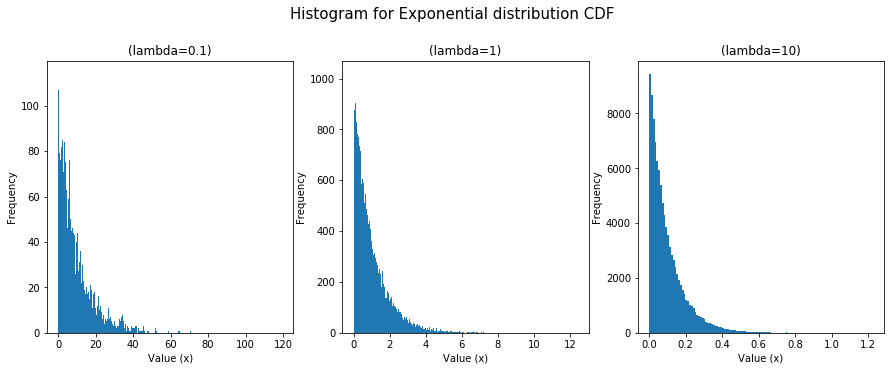

In [203]:
#Exponential CDF plot

w = 0.01

# plotting to represent data on a 2D space
fig, ax = plt.subplots(1,3,figsize=(15,5))
n = math.ceil((X1.max() - X1.min())/w)
ax[0].hist(X1, bins = n)
ax[0].set_xlabel("Value (x)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("(lambda=0.1)")
n = math.ceil((X2.max() - X2.min())/w)
ax[1].hist(X2, bins = n)
ax[1].set_xlabel("Value (x)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("(lambda=1)")
n = math.ceil((X3.max() - X3.min())/w)
ax[2].hist(X3, bins = n)
ax[2].set_xlabel("Value (x)")
ax[2].set_ylabel("Frequency")
ax[2].set_title("(lambda=10)")

plt.suptitle('Histogram for Exponential distribution CDF', fontsize=15, y=1.03)
plt.show()


### Question 2: Gamma distribution

In [204]:
# function for generating gamma distribution
def gamm(K,beta,size=100000):
    lambd=1/beta
    Y=0
    for k in range(K):
        Y=Y+expo(lambd,size)
        #print(str(k)+":"+str(Y))
    return(Y)

In [205]:
#calling the function for parameters sets: [5,0.1], [5,1] and [5,10]
K=5

beta1=0.1
Y1=gamm(K,beta1,100000)

beta2=1
Y2=gamm(K,beta2,100000)

beta3=10
Y3=gamm(K,beta3,100000)

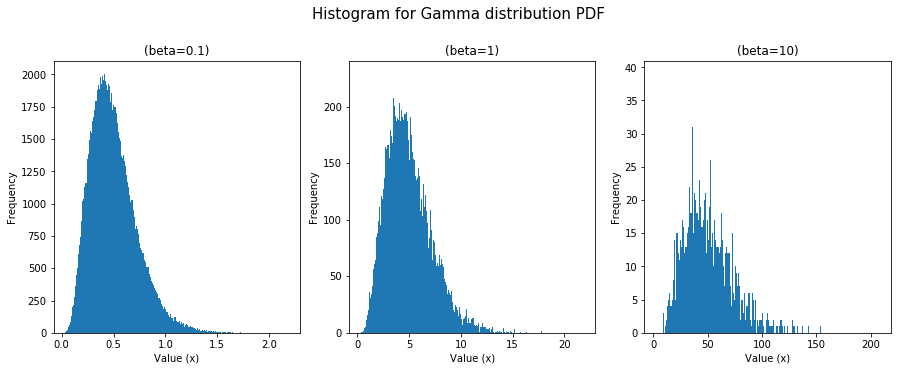

In [206]:
#Gamma PDF plot

w = 0.01

# plotting to represent data on a 2D space
fig, ax = plt.subplots(1,3,figsize=(15,5))
n = math.ceil((Y1.max() - Y1.min())/w)
ax[0].hist(Y1, bins = n)
ax[0].set_xlabel("Value (x)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("(beta=0.1)")
n = math.ceil((Y2.max() - Y2.min())/w)
ax[1].hist(Y2, bins = n)
ax[1].set_xlabel("Value (x)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("(beta=1)")
n = math.ceil((Y3.max() - Y3.min())/w)
ax[2].hist(Y3, bins = n)
ax[2].set_xlabel("Value (x)")
ax[2].set_ylabel("Frequency")
ax[2].set_title("(beta=10)")

plt.suptitle('Histogram for Gamma distribution PDF', fontsize=15, y=1.03)
plt.show()

### Question 3: Beta Distribution

In [207]:
# create a function to generate beta distribution (from uniform distribution)
def beta_from_uniform(alpha1,alpha2,size=100000):
    k=alpha1
    n=alpha2+alpha1-1
    beta=[]
    for i in range(size):
        x_n=[]
        for j in range(n):
            x_n.append(np.random.uniform(0,1))
        x_n.sort() # order statistic
        beta.append(x_n[k-1])
    return beta

In [208]:
# use above function to draw samples from beta distribution
BU1= beta_from_uniform(5,16)

BU2= beta_from_uniform(10,11)

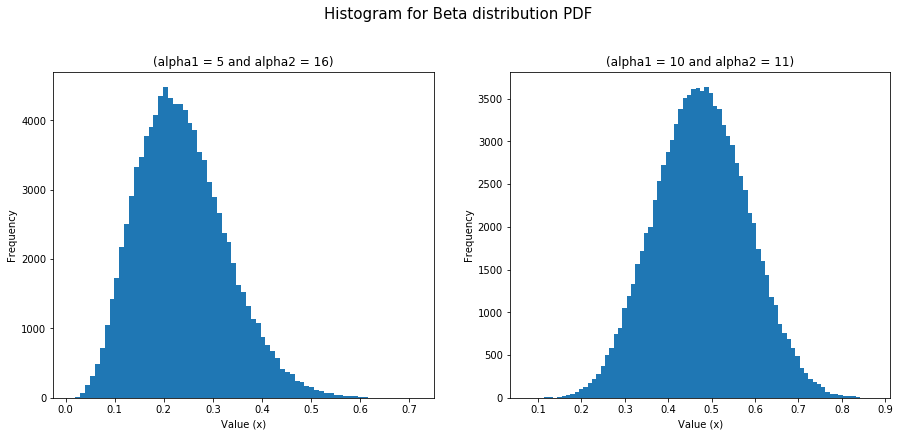

In [209]:
#Beta PDF plot

w = 0.01

# plotting to represent data on a 2D space
fig, ax = plt.subplots(1,2,figsize=(15,6))
n = math.ceil((max(BU1) - min(BU1))/w)
ax[0].hist(BU1, bins = n)
ax[0].set_xlabel("Value (x)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("(alpha1 = 5 and alpha2 = 16)")
n = math.ceil((max(BU2) - min(BU2))/w)
ax[1].hist(BU2, bins = n)
ax[1].set_xlabel("Value (x)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("(alpha1 = 10 and alpha2 = 11)")


plt.suptitle('Histogram for Beta distribution PDF', fontsize=15, y=1.03)
plt.show()

##### from Gamma distribution (created above)

In [210]:
# function to generate beta distribution from gamma distribution
def beta(alpha1,alpha2,size=100000):
    X=gamm(alpha1,1,size)
    Y=gamm(alpha2,1,size)
    B=X/(X+Y)
    return(B)

In [211]:
#calling the function for parameters sets: [5,16] and [10,11]
alp1=5
alp2=16
B1=beta(alp1,alp2,100000)

alp3=10
alp4=11
B2=beta(alp3,alp4,100000)

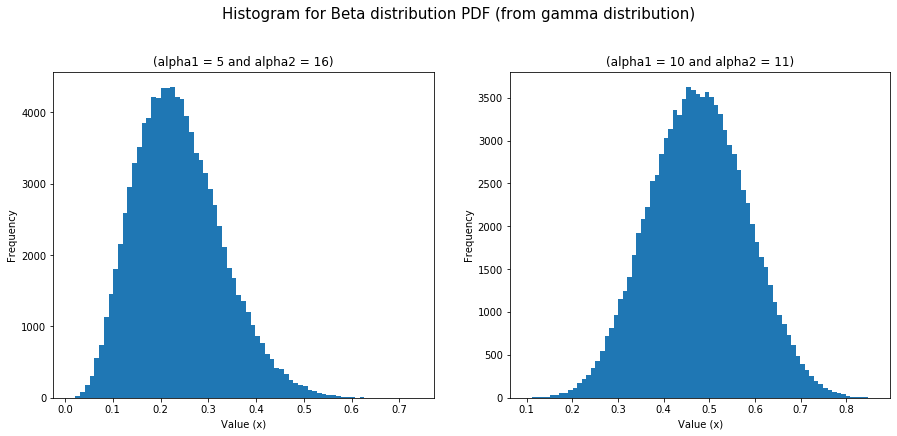

In [212]:
#Beta PDF plot

w = 0.01

# plotting to represent data on a 2D space
fig, ax = plt.subplots(1,2,figsize=(15,6))
n = math.ceil((B1.max() - B1.min())/w)
ax[0].hist(B1, bins = n)
ax[0].set_xlabel("Value (x)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("(alpha1 = 5 and alpha2 = 16)")
n = math.ceil((B2.max() - B2.min())/w)
ax[1].hist(B2, bins = n)
ax[1].set_xlabel("Value (x)")
ax[1].set_ylabel("Frequency")
ax[1].set_title("(alpha1 = 10 and alpha2 = 11)")


plt.suptitle('Histogram for Beta distribution PDF (from gamma distribution)', fontsize=15, y=1.03)
plt.show()

### Question 4: Dirichlet Distribution

##### Part (a)

In [213]:
# function to generate dirichlet distribution using gamma distribution
def dirichlet(alpha,size=100000):
    Y=[]
    for i in range(len(alpha)):
        Y.append(gamm(alpha[i],1,size))
    D=(Y/np.sum(Y,axis=0)).T
    return(D)

In [214]:
#call function for [alpha1,alpha2,alpha3]=[10,10,10]
N=3
alphas=[10,10,10]
D_mat=dirichlet(alphas)
D1=pd.DataFrame(dirichlet(alphas))
D1.columns=["alpha1","alpha2","alpha3"]

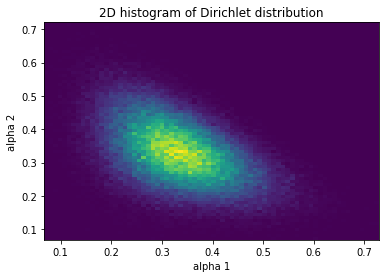

In [215]:
#creating 2D histogram for Dirichlet Distribution
plt.hist2d(D_mat[:,0], D_mat[:,1], bins=(int(np.max(D_mat[:,0])/0.01), int(np.max(D_mat[:,1])/0.01)))
plt.xlabel('alpha 1')
plt.ylabel('alpha 2')
plt.title("2D histogram of Dirichlet distribution")
plt.show()

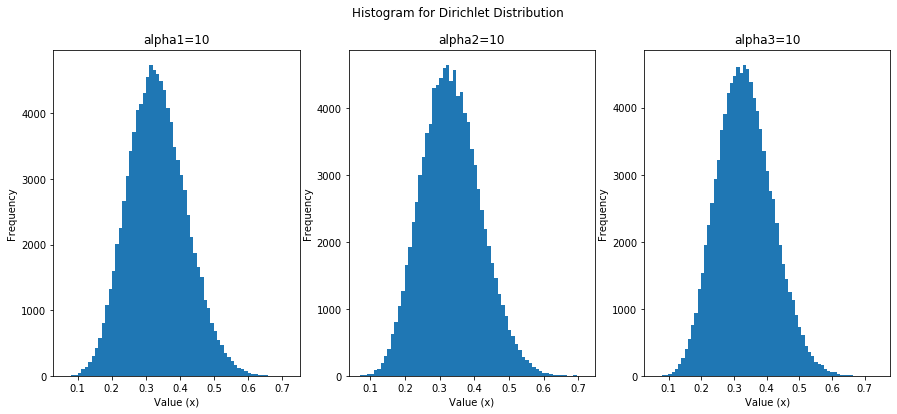

In [216]:
#plot the histograms
w=0.01
i=0
fig, ax = plt.subplots(1,len(D1.columns.tolist()),figsize=(15,6))
for c in D1.columns.tolist():    
    n = math.ceil((D1[c].max() - D1[c].min())/w)
    ax[i].hist(x=c,bins=n,data=D1)
    ax[i].set_xlabel("Value (x)")
    ax[i].set_ylabel("Frequency")
    ax[i].set_title(D1.columns[i]+"="+str(alphas[i]))
    
    i=i+1
    
plt.suptitle("Histogram for Dirichlet Distribution")
plt.show()

##### Part (b)

In [217]:
# function to generate dirichlet distribution from beta distribution (stick problem)
def dir_from_beta_single_run(alpha):
    B_all=[]
    for i in range(len(alpha)-1):
        B=beta(alpha[i],sum(alpha[i+1:]),size=1)
        B_all.append(B)
    Y=[B_all[0]]
    for j in range(1,len(B_all)):
        prod=1
        for k in range(j):
            prod=prod*(1-B_all[k])
        Y.append(B_all[j]*prod)
    Y.append(1-sum(Y))
    return(Y)

def dir_from_beta_sim(alpha=[10,10,10],size=100000):
    DB=[]
    for i in range(size):
        DB.append(dir_from_beta_single_run(alpha))
    return(np.array(DB))

In [218]:
#call function for [alpha1,alpha2,alpha3]=[10,10,10]
alphas=[10,10,10]
DB1= dir_from_beta_sim(alphas)
DB1=DB1.reshape(100000,3)

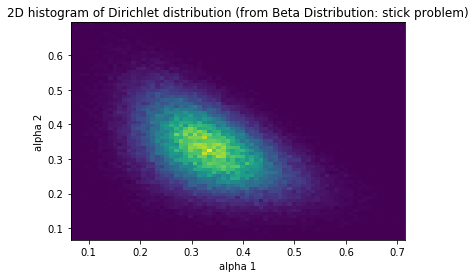

In [219]:
# creating 2D plot of the above dstribution
plt.hist2d(np.array(DB1)[:,0], np.array(DB1)[:,1], bins=(int(np.max(np.array(DB1)[:,0])/0.01), int(np.max(np.array(DB1)[:,1])/0.01)))
plt.xlabel('alpha 1')
plt.ylabel('alpha 2')
plt.title("2D histogram of Dirichlet distribution (from Beta Distribution: stick problem)")
plt.show()